# Exploración y preparación de los datos
Importamos las librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

## Análisis exploratorio de los datos
Primero, leemos el conjunto de datos de SpaceX en un marco de datos de Pandas e imprimimos su resumen


In [4]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)
dataset_part_2_csv = io.BytesIO(response.content)
df = pd.read_csv(dataset_part_2_csv)
print(df.head(2))

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   

     Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  ReusedCount  \
0  None None        1     False   False  False        NaN    1.0            0   
1  None None        1     False   False  False        NaN    1.0            0   

  Serial  Longitude   Latitude  Class  
0  B0003 -80.577366  28.561857      0  
1  B0005 -80.577366  28.561857      0  


En primer lugar, intentemos ver cómo las variables FlightNumber (que indica los intentos de lanzamiento continuos) y Payload afectarían el resultado del lanzamiento.

Podemos representar gráficamente FlightNumber vs PayloadMass y superponer el resultado del lanzamiento. Vemos que a medida que aumenta el número de vuelo, es más probable que la primera etapa aterrice con éxito. La masa de la carga útil también parece ser un factor; incluso con cargas útiles más pesadas, la primera etapa suele regresar con éxito.

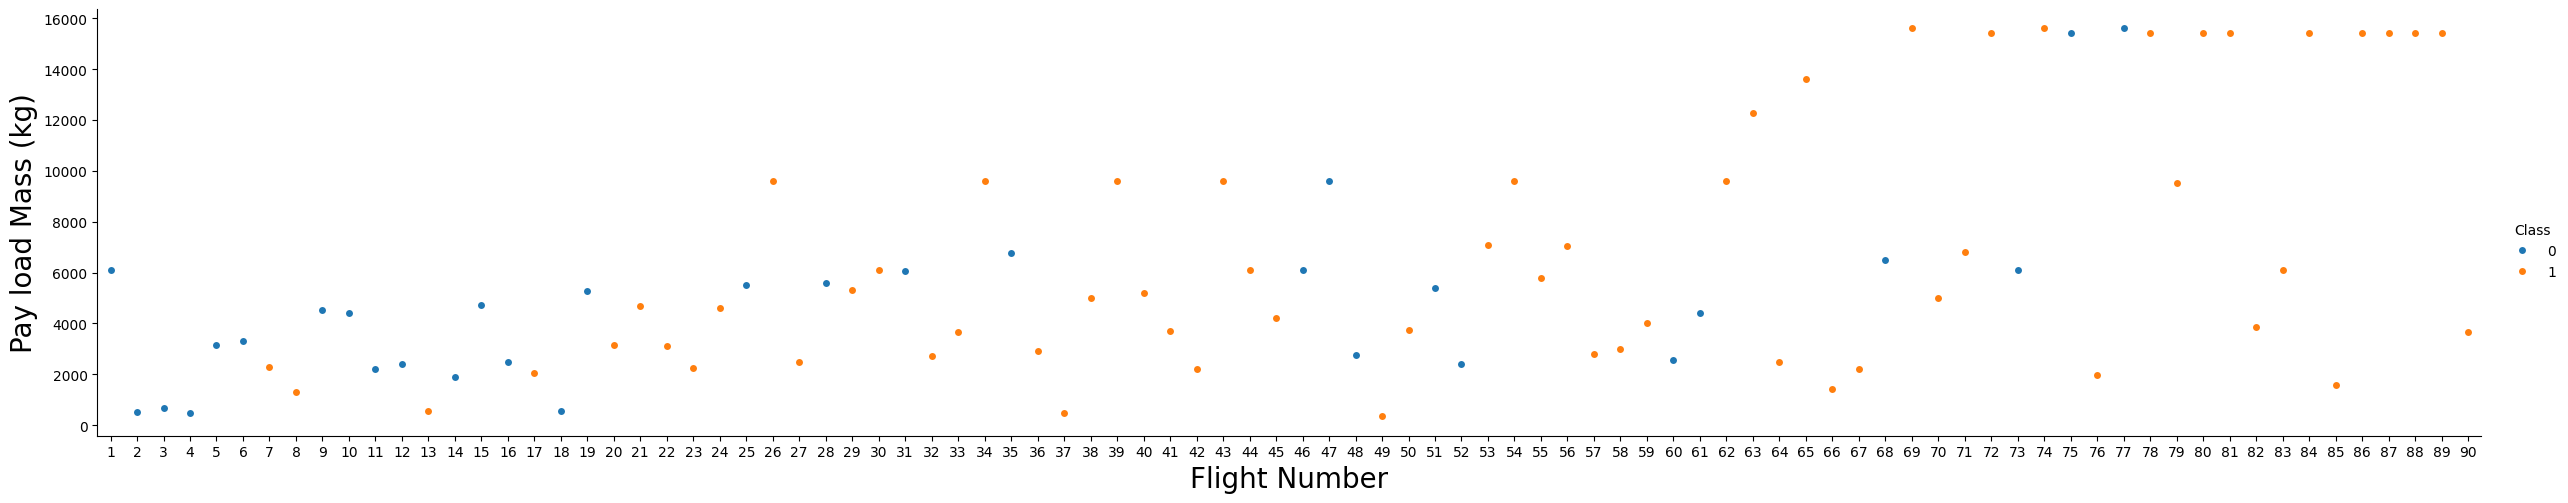

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

A continuación, analizaremos en profundidad cada sitio para visualizar sus registros de lanzamiento detallados.

### Visualizamos la relación entre el Flight Number y el Launch Site

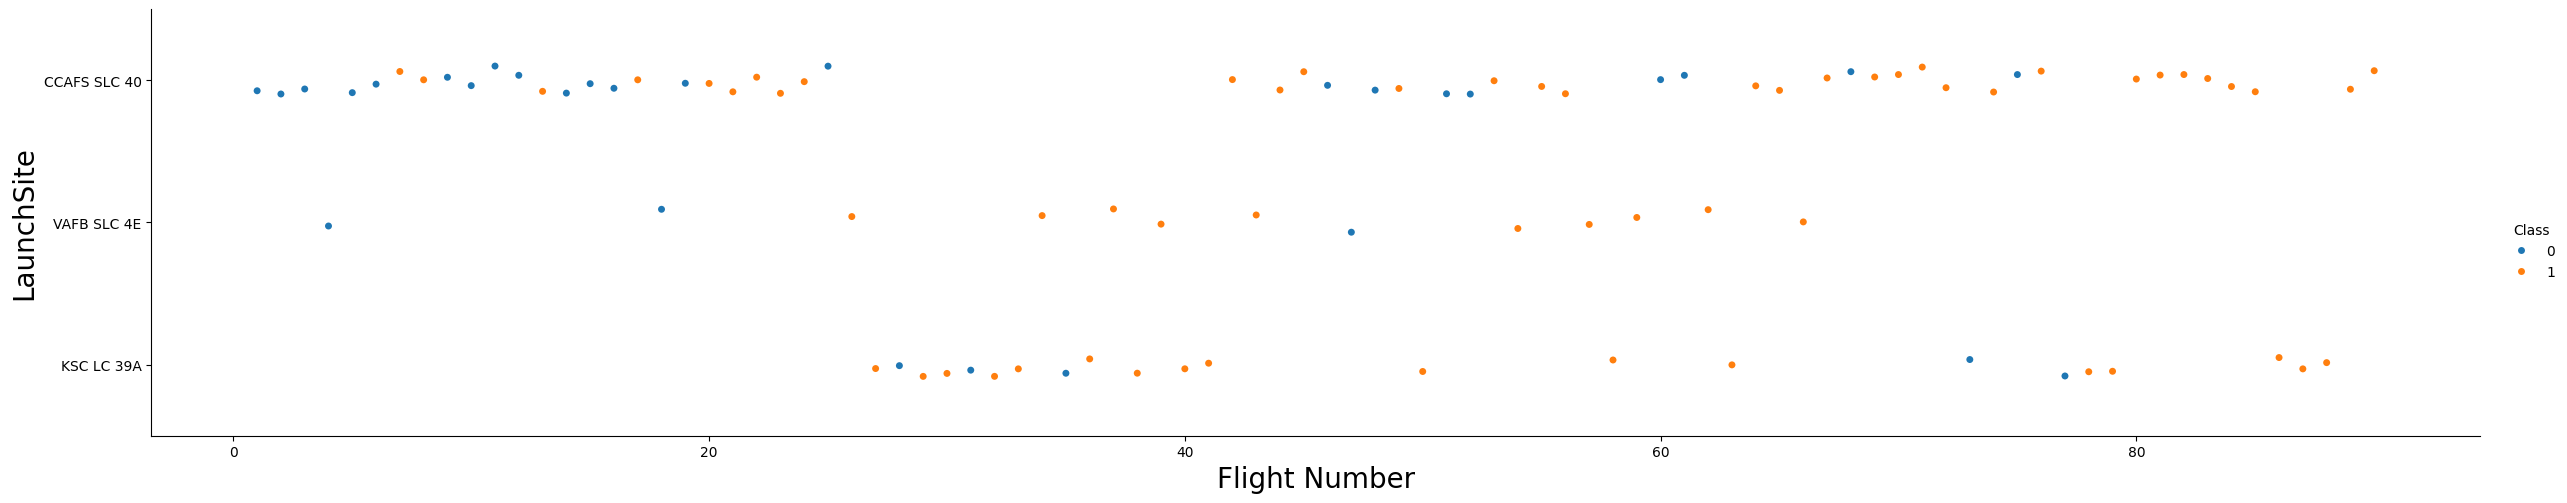

In [6]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Ahora se intentará explicar los patrones que se encontraron en los gráficos de puntos de dispersión del número de vuelo frente al sitio de lanzamiento.

R: Del gráfico se observa que se realizaron más vuelos desde CCAFS SLC 40, mientras que se obtuvieron menores tasas de éxito en las otras dos plataformas de vuelo. Adicional a esto se observa que existe relación entre la plataforma de vuelo y el resultado.

### Viasualizamos la relación entre la masa de la carga útil y el sitio de lanzamiento
También queremos observar si existe alguna relación entre los sitios de lanzamiento y su masa de carga útil.

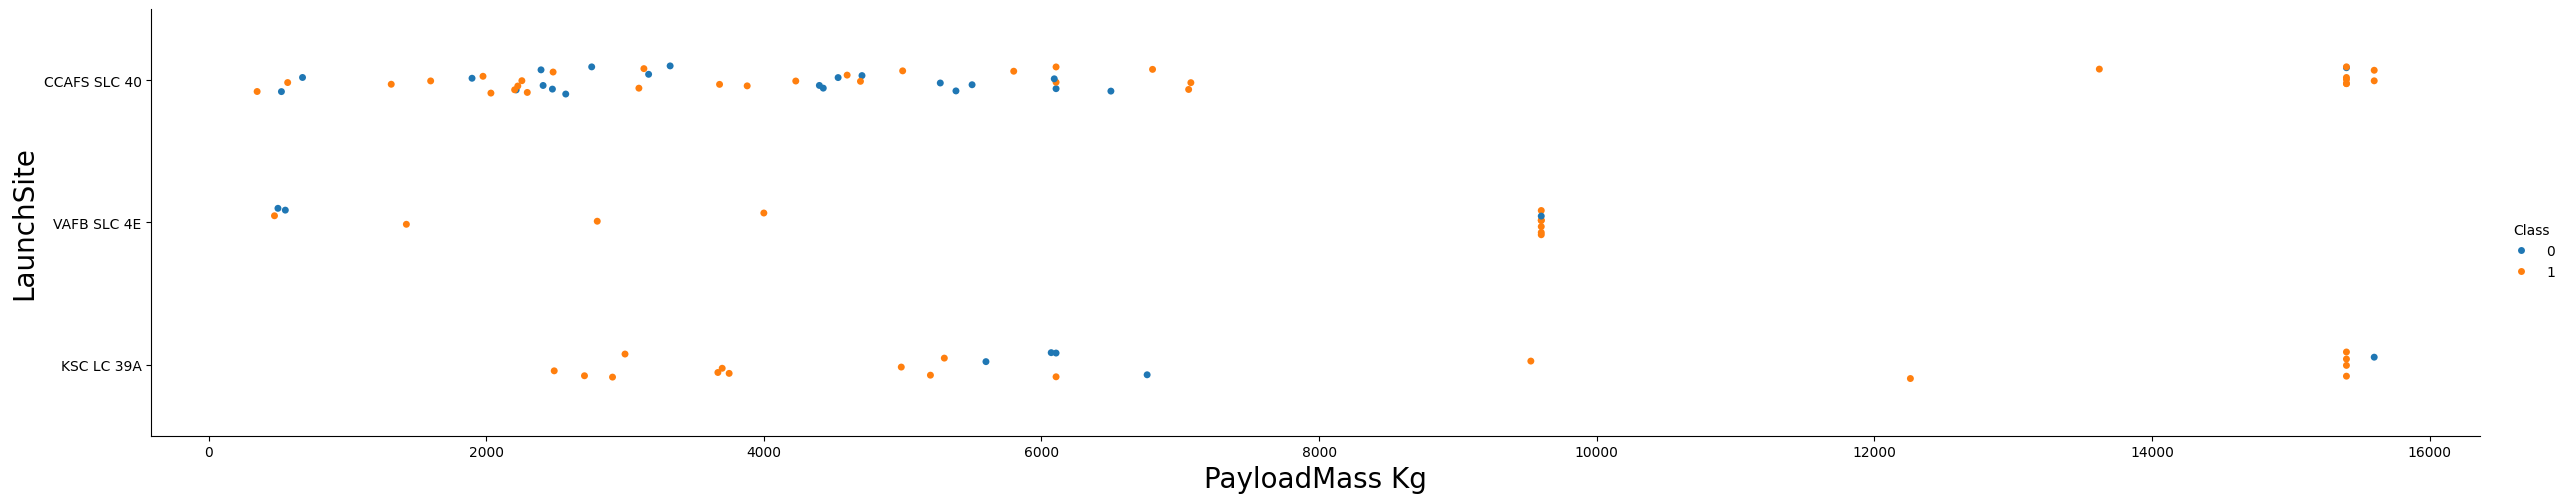

In [7]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass Kg",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Del gráfico se observa que para el sitio de lanzamiento VAFB-SLC no se lanzaron cohetes para una masa de carga útil pesada (superior a 10 000).

### Visualizamos la relación entre la tasa de éxito de cada tipo de órbita
A continuación, comprobaremos visualmente si existe alguna relación entre la success y el orbit type utilizando un gráfico de barras

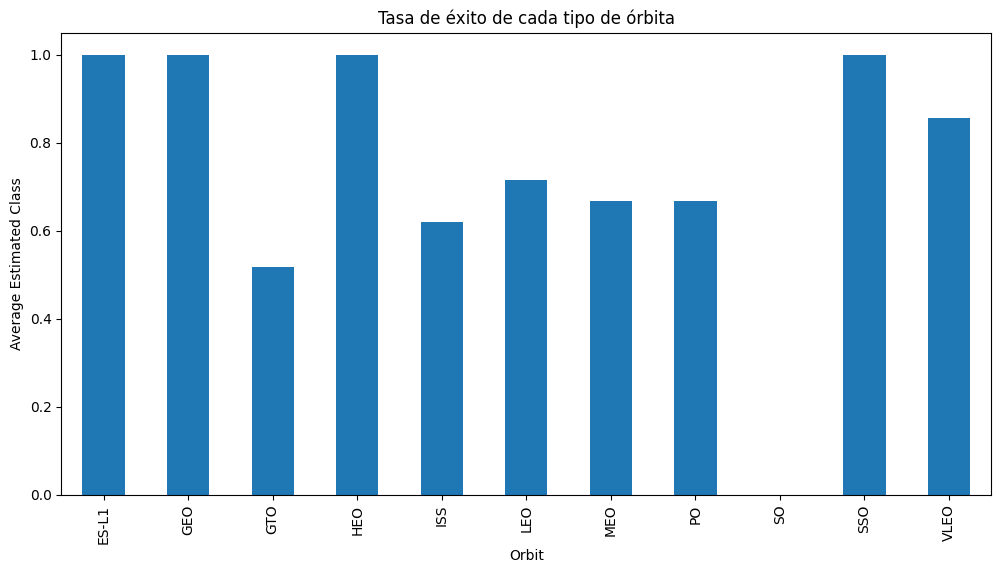

In [8]:
# Utilizamos el método groupby en la columna Órbita y determinamos la media de la columna Clase
df_orbit= df.groupby('Orbit')['Class'].mean()

# Graficamos los datos
df_orbit.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Orbit')
plt.ylabel('Average Estimated Class')
plt.title('Tasa de éxito de cada tipo de órbita')
plt.show()

Del gráfico se observa que las órbitas que tienen mayor posibilidad de éxito son Lagrange 1, GEO, HEO y SSo

### Visualizamos la relación entre FlightNumber y el tipo de órbita
Para cada órbita, queremos ver si existe alguna relación entre FlightNumber y el tipo de órbita.

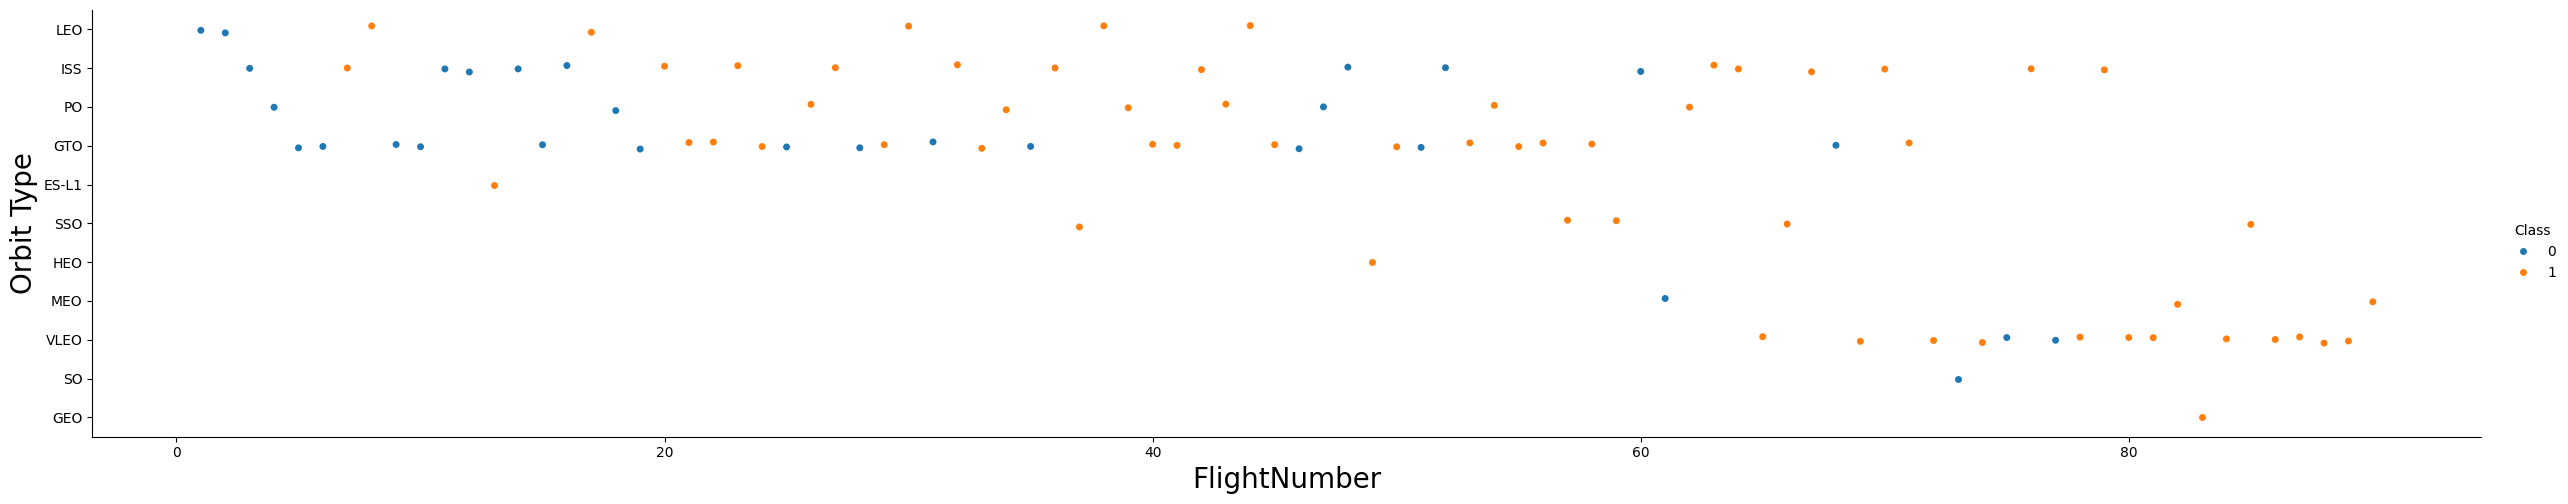

In [9]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

Se puede observar que en la órbita LEO, el éxito parece estar relacionado con el número de vuelos. Por el contrario, en la órbita GTO, no parece haber relación entre el número de vuelos y el éxito.

### Visualizamos la relación entre la masa de la carga útil y el tipo de órbita
De manera similar, podemos trazar gráficos de puntos de dispersión de la masa de la carga útil frente a la órbita para revelar la relación entre la masa de la carga útil y el tipo de órbita

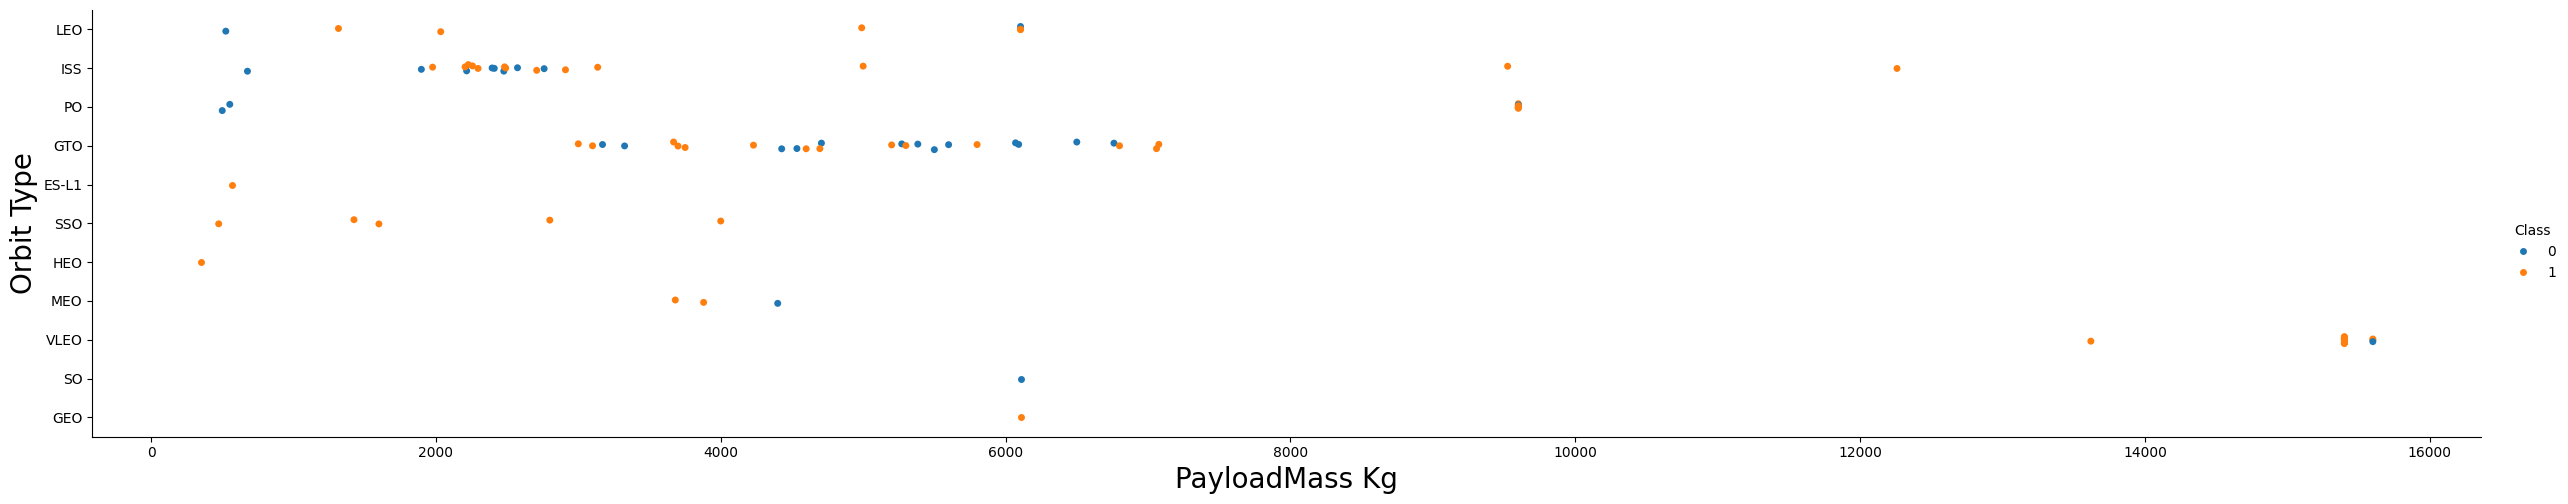

In [10]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass Kg",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

Con cargas útiles pesadas, la tasa de aterrizajes exitosos o de aterrizajes positivos es mayor en el caso de la órbita polar, la órbita baja y la Estación Espacial Internacional.

Sin embargo, en el caso de la Tierra Media, es difícil distinguir entre aterrizajes exitosos y fallidos, ya que ambos resultados están presentes.

### Visualizamos la tendencia anual de éxito de lanzamiento
Se puede trazar un gráfico de líneas con el eje x como Año y el eje y como la tasa de éxito promedio, para obtener la tendencia de éxito de lanzamiento promedio.

In [11]:
# Función para extraer años de la fecha
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


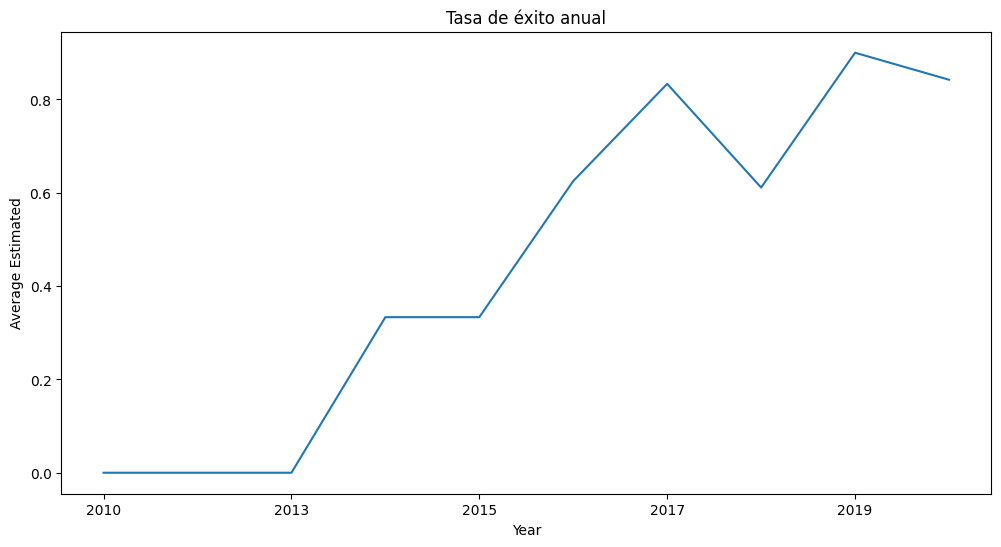

In [12]:
plt.figure(figsize=(12, 6))

df_year = df.groupby('Date')['Class'].mean()
df_year.plot(x=df_year.index, y=df_year.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated')
plt.title('Tasa de éxito anual')
plt.show()

Se puede observar que la tasa de éxito desde 2013 siguió aumentando hasta 2020.

## Ingeniería de características
Seleccionaremos las características que se utilizarán en la predicción del éxito en el módulo futuro.

In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Creamos las variables ficticias para columnas categóricas

In [14]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### Convertimos todas las columnas numéricas a float64

In [15]:
features_one_hot = features_one_hot.astype('Float64')
features_one_hot.dtypes

FlightNumber    Float64
PayloadMass     Float64
Flights         Float64
GridFins        Float64
Reused          Float64
                 ...   
Serial_B1056    Float64
Serial_B1058    Float64
Serial_B1059    Float64
Serial_B1060    Float64
Serial_B1062    Float64
Length: 80, dtype: object